**The first thing to do is to run Creator.py to setup the dataset. First specify the options**


In [12]:
import numpy as np
# The Name of the Dataset
Name = "British-Coins-Updated-1p-2p/Coins-100-inv_log_freq_2_6_100"

# Frequency Array
Frequencies=np.array([119.25,17800.875])#,238.5,298.125,357.75,477,596.25,715.5,954,1192.5,1431,1908,2385,2862,3816,4770,5724,7632,9540,12402,16218,20988,26712,34344,43884,57240,73458,95400])
Frequencies = Frequencies*6.28 #Convert to rad/s'
#Frequencies=np.logspace(2,8,150)
#Frequencies=np.logspace(2,6,100)

# Classes to Include
Classes = ["British_Coins_Updated_1p_2p"]
#
# Global number of results
# Coin Problem
extend_results = 'global_obj'

# Number of secondary results if 'global_obj'

#Coin Problem`
Num_Results = 500

# Classes if 'global_class' or 'classwise'
class_split=[]

# Name each of the classes this is done in order
class_names = []

# Number of results if 'global_class'
Num_Results_class = []


# (int) Number of results per class results per class if 'classwise'
class_num_results = []

#Labeler False,'Classwise', 'Objectwise'
Label_Data = 'Objectwise'
Name_Objects = True

#(dictionary) name the objects as you wish them to appear in the classificaiton
Object_Names_dictionary ={"Two_Pound":r"£2", "Ten_Pence":r"10p_(new)", "Ten_Pence_non_magnetic":r"10p_(old)", "One_Pound":r"£1", "Two_Penny":r"2p_(new)",
                              "Two_Penny_non_magnetic":r"2p_(old)", "Twenty_Pence":r"20p", "Five_Pence":r"5p_(new)", "Five_Pence_non_magnetic":r"5p_(old)",
                              "Fifty_Pence":r"50p", "One_Penny":r"1p_(new)", "One_Penny_non_magnetic":r"1p_(old)"}


Name_Order = ["One_Penny","One_Penny_non_magnetic","Two_Penny","Two_Penny_non_magnetic","Five_Pence","Five_Pence_non_magnetic",
             "Ten_Pence","Ten_Pence_non_magnetic","Twenty_Pence","Fifty_Pence","One_Pound","Two_Pound"]

#How to scale
Scale_type = 'Global'

#Which file (This is not currently used)
Scale_File = 'Coin_DataSet.csv'


#Alpha scale
Alpha_scale = 0.84

#Sigma scale
Sigma_scale = 12.5

# Path Name for where the class data is stored
Class_dir = "Classes_Ben"

# Create a dictionary of these settings
Creator_Settings = {"Name":Name,"Frequencies":Frequencies,"Classes":Classes,"extend_results":extend_results,"Num_Results":Num_Results,#
                    "class_split":class_split,"class_names":class_names,"Num_Results_class":Num_Results_class,"class_num_results":class_num_results,\
                    "Label_Data":Label_Data,"Name_Objects":Name_Objects,"Object_Names_dictionary":Object_Names_dictionary,"Name_Order":Name_Order,\
                    "Scale_type":Scale_type,"Scale_File":Scale_File,"Alpha_scale":Alpha_scale,"Sigma_scale":Sigma_scale, "Class_dir":Class_dir}

In [13]:
# Run the Creator script
from Creator import *
#DataSet_Name=Creator(Name,Frequencies,Classes,extend_results,Num_Results,class_split,class_names,\
#            Num_Results_class,class_num_results,Label_Data, Name_Objects,Object_Names_dictionary,Name_Order,Scale_type,Scale_File,\
#            Alpha_scale,Sigma_scale)
DataSet_Name=Creator(Creator_Settings)

The folder path to the dataset is: British-Coins-Updated-1p-2p/Coins-100-inv_log_freq_2_6_100_Al_0.84_Sig_12.5
Class type is a list
One_Pound
Twenty_Pence
Ten_Pence_non_magnetic
Fifty_Pence
One_Penny
Two_Penny_non_magnetic
Five_Pence_non_magnetic
Ten_Pence
One_Penny_non_magnetic
Two_Pound
Five_Pence
Two_Penny
(6000, 2) 2


In [2]:
# This is the dataset name to be used with the classifier

#DataSet_Name="British-Coins-Updated-1p-2p/Coins-100_Al_0.84_Sig_12.5"
#DataSet_Name="British-Coins-Updated-1p-2p/Coins-100_Al_0.84_Sig_12.5"
#DataSet_Name="British-Coins-Updated-1p-2p/Coins-100-inv_Al_0.84_Sig_12.5"
DataSet_Name="British-Coins-Updated-1p-2p/Coins-100-inv_log_freq_2_6_100_Al_0.84_Sig_12.5"
print(DataSet_Name)

British-Coins-Updated-1p-2p/Coins-100-inv_log_freq_2_6_100_Al_0.84_Sig_12.5


**The next part involves running the actual classifier. This is done using Trainer_PDL.py**

In [4]:
# Option to load external testing data from disk. Requires that external_file_loader.py be run first.
Load_External_Data = False 
# Option to plot comparison figures between the input array of simulated data and the external test data.
# Currently only supported for a single class test set.
Plot_Comparison_Figures = True
# Option to additionally save to disk: the model for each bootstrap iteration, the normalisation coefficients for each,
# bootstrap iteration, and the input array for each model, Used for debugging.
Full_Save = False

# Option to use SVD to reduce the number of features
Reduce_Features = False

#Model to be used
#Optional models 'LogisticRegression', 'SVM', 'DecisionTree', 'RandomForest', 'GradientBoost', 'MLP','MLP,(n1,n2,...,nn)'
Models_to_run = ['LogisticRegression']#,'SVM','GradientBoost']

#Features
#Features = ['Eig1']#['AngleRtildeI']#['Pri1','Pri2','Pri3']#['AngleRtildeI']#
#Features = ['Eig1', 'Eig2', 'Eig3']
Features = ['Eig1']#['AngleRtildeI'] #['Pri1','Pri2','Pri3']
#(list) list of features to be used options:
#'Eig1','Eig2','Eig3','Pri1','Pri2','Pri3','Dev2','Dev3','Com','AngleRtildeI'
#Eigenvalues, Principal invarients, Deviatoric invarients, Comutator, Angle between Rtilde and I

#How many times would you like to train the model
Bootstrap_Repetitions = 1
#(int) how many times to train the model to obtain an average accuracy

# use default levels of SNR
SNR_array=[]

# Make plot of first two reduced invairants
Plot_Principal_Componenets = False

Trainer_Settings = {"DataSet_Name": DataSet_Name, "Load_External_Data":Load_External_Data, "Plot_Comparison_Figures":Plot_Comparison_Figures,\
                   "Full_Save": Full_Save, "Reduce_Features":Reduce_Features, "Models_to_run": Models_to_run, "Features":Features, #
                    "Bootstrap_Repetitions": Bootstrap_Repetitions, "SNR_array": SNR_array, "Plot_Principal_Componenets": Plot_Principal_Componenets }

In [ ]:
from Trainer_PDL import *

#main(DataSet_Name,Load_External_Data,Plot_Comparison_Figures,Full_Save,Reduce_Features,Models_to_run,Features,Bootstrap_Repetitions)
main(Trainer_Settings)

Noise level =  5
(6000, 36)
(6000, 6) (6000, 4)
Data [[ 8.37478120e-08 -3.80048314e-06  7.21633130e-09 ...  0.00000000e+00
   4.12860345e-06  4.37416480e-07]
 [ 8.37478120e-08 -3.80048314e-06  7.21633130e-09 ...  0.00000000e+00
   4.34806028e-06  4.21967475e-07]
 [ 8.37478120e-08 -3.80048314e-06  7.21633130e-09 ...  0.00000000e+00
   5.67962240e-06  3.08245127e-07]
 ...
 [ 1.25078233e-06 -3.23823626e-06  1.99910131e-07 ...  0.00000000e+00
   1.30658271e-06  3.05447634e-04]
 [ 1.25078233e-06 -3.23823626e-06  1.99910131e-07 ...  0.00000000e+00
   1.31519385e-06  2.76923983e-04]
 [ 1.25078233e-06 -3.23823626e-06  1.99910131e-07 ...  0.00000000e+00
   1.25295585e-06  5.79172502e-04]]
to here
LogisticRegression
12 0 4 4500
[0.51405566 0.61370739 0.34934654 0.76248347]
[-0.58144647  0.0143892  -0.47167022 -0.47054472]
[1.79140195 0.00887094 2.24149289 2.24728156]
[-0.7323408  -1.02360515 -0.38142807 -0.33760111]
[ 0.52616783  0.94577681 -0.03137188 -0.18745693]
[-0.54285104  0.67761837 -0.51

In [4]:
from scipy.stats import gaussian_kde
from scipy.integrate import quad
import numpy as np

# Generate two random probability distributions
samples=100
var=10
p = np.random.rand(samples)
q = np.random.rand(samples)

# Estimate the kernel density of the samples
kernel_p = gaussian_kde(p)
kernel_q = gaussian_kde(q)

inter = max(p) - min(p)
start = min(p) - inter/2
stop  = max(p) + inter/2

# Evaluate the KL divergence
kl_div, _ = quad(lambda x: (kernel_p(x) * np.log2(kernel_p(x) / kernel_q(x))), start, stop)
print(kl_div)


0.13619000055906763


In [119]:
from scipy.stats import gaussian_kde
from scipy.integrate import quad
import numpy as np

# Generate two random probability distributions
samples=100
var=1
p = np.random.rand(samples,var)
q = np.random.rand(samples,var)

# Estimate the kernel density of the samples
kernel_p = gaussian_kde(p.T)
kernel_q = gaussian_kde(q.T)
print(kernel_p.covariance)
print(np.cov(p.T))

inter = max(p) - min(p)
start = min(p) - inter/2
stop  = max(p) + inter/2

# Evaluate the KL divergence
kl_div, _ = quad(lambda x: (0.5*kernel_p(x) * np.log(kernel_p(x) / kernel_q(x))), start, stop)
print("kldiv est",kl_div)
kl_div, _ = quad(lambda x: (0.5*kernel_q(x) * np.log(kernel_q(x) / kernel_p(x))), start, stop)
print("kldiv est",kl_div)


# Direct evaluation using the formula
mu_p = np.array(np.mean(p))
mu_q = np.array(np.mean(q))
cov_p = kernel_p.covariance/kernel_p.factor**2
cov_q = kernel_q.covariance/kernel_q.factor**2
print(cov_p,np.cov(p.T))
icov_p = kernel_p.inv_cov*kernel_p.factor**2
icov_q = kernel_q.inv_cov*kernel_q.factor**2
#print(icov_p*np.array(mu_p-mu_q))
dp=np.linalg.det(cov_p)
dq=np.linalg.det(cov_q)
#help(kernel_p)

print(1/2.*(mu_p-mu_q)*(icov_q*(mu_p-mu_q)) + 1/2.*(np.trace(icov_q*cov_p)-1+np.log(np.abs(dq/dp))))
print(1/2.*(mu_p-mu_q)*(icov_p*(mu_p-mu_q)) + 1/2.*(np.trace(icov_p*cov_q)-1+np.log(np.abs(dp/dq))))

[[0.01220291]]
0.07699513533121759
kldiv est 0.009376630652298358
kldiv est 0.011493426434629563
[[0.07699514]] 0.07699513533121759
[[0.01262015]]
[[0.0142344]]


In [118]:
import numpy as np
from scipy import stats
import matplotlib.pylab as plt

In [31]:
n_basesample = 1000
np.random.seed(87650678)
xn = np.random.randn(n_basesample)

In [38]:
gkde=stats.gaussian_kde(xn)
# Note that we need to take account of the covairance factor!
print(gkde.covariance/gkde.factor**2)
#help(gkde)
print(np.cov(xn))

[[0.95839457]]
0.958394573155834


In [34]:
ind = np.linspace(-7,7,101)
kdepdf = gkde.evaluate(ind)

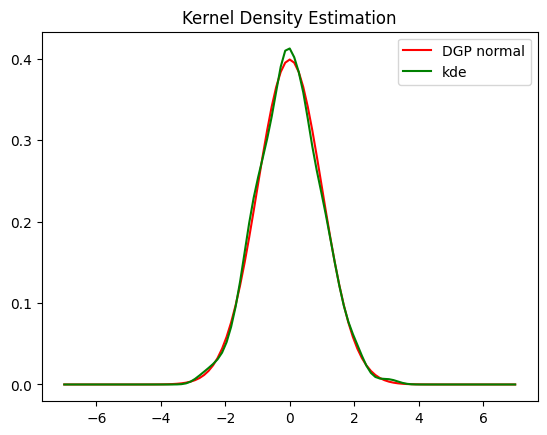

In [35]:
plt.figure()
# plot histgram of sample
#plt.hist(xn, bins=20, normed=1)
# plot data generating density
plt.plot(ind, stats.norm.pdf(ind), color="r", label='DGP normal')
# plot estimated density
plt.plot(ind, kdepdf, label='kde', color="g")
plt.title('Kernel Density Estimation')
plt.legend()
#plt.show()

In [91]:
def kl_div(p,q):
    return sum(p[i]*np.log(p[i]/q[i]) for i in range(len(p)))

p=[0.1,0.4, 0.5]
q=[0.8, 0.15, 0.05]
kl_pq=kl_div(p,q)
print("kl_pq",kl_pq)
kl_qp=kl_div(q,p)
print("kl_qp",kl_qp)

from scipy.special import rel_entr
print("kl_pq",sum(rel_entr(p,q)))
kl_qp=kl_div(q,p)
print("kl_qp",sum(rel_entr(q,p)))


kl_pq 1.3356800935337299
kl_qp 1.4012995907424075
kl_pq 1.3356800935337299
kl_qp 1.4012995907424075
